# 手动实现逻辑回归

逻辑回归可以看成是只有一个神经元的神经网络。激活函数使用sigmoid函数，损失函数使用交叉熵损失函数。

[] <img src="./逻辑回归.png">

In [18]:
import matplotlib.pyplot as plt
# 导入相关库
import numpy as np

## Sigmoid函数

$$
sigmoid(z) = \frac{1}{1 + e^{-z}}
$$

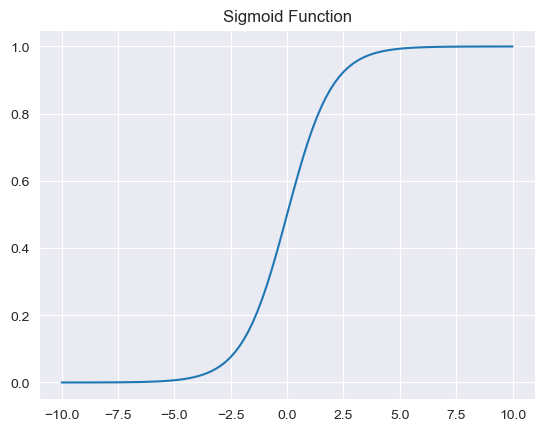

In [5]:
# 定义 Sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.show()

## 交叉熵损失函数

$$
L = -\frac{1}{N}\sum_{i=1}^{N}y_i\log{\hat{y_i}} + (1-y_i)\log{(1-\hat{y_i})}
$$

In [3]:
# 定义交叉熵损失函数
def cross_entropy(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

## 梯度下降

$$
\boldsymbol w = \boldsymbol w - \alpha\frac{\partial L}{\partial \boldsymbol w}
$$

## 封装完整的逻辑回归模型

In [6]:
class MyLogisticRegression:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y, lr=0.01, epochs=10000):
        # 初始化参数
        self.w = np.random.randn(X.shape[1])  # 权重
        self.b = np.random.randn()  # 偏置

        # 梯度下降
        for _ in range(epochs):
            y_hat = self._predict_proba(X)

            # 计算梯度
            dw = np.dot(X.T, y_hat - y) / len(X)
            db = np.sum(y_hat - y) / len(X)

            # 更新参数
            self.w -= lr * dw
            self.b -= lr * db

    def _predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)

    def predict(self, X):
        y_proba = self._predict_proba(X)
        return np.where(y_proba >= 0.5, 1, 0)

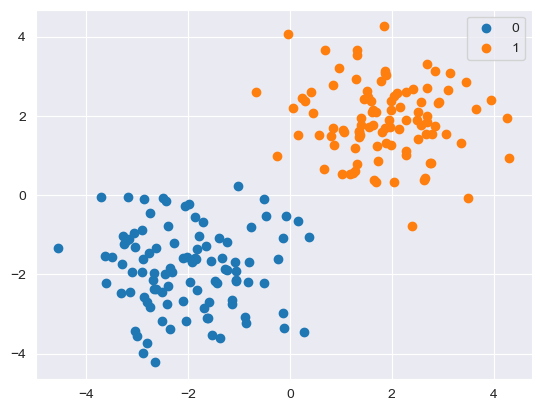

In [24]:
# 生成数据
np.random.seed(0)
X1 = np.random.randn(100, 2) - 2
X2 = np.random.randn(100, 2) + 2
X = np.vstack((X1, X2))  # 200个样本，每个样本2个特征
y = np.array([0 if i < 100 else 1 for i in range(200)])  # 100个0类样本，100个1类样本
plt.scatter(X[:100, 0], X[:100, 1], label='0')
plt.scatter(X[100:, 0], X[100:, 1], label='1')
plt.legend()
plt.show()

In [25]:
# 训练模型
model = MyLogisticRegression()
model.fit(X, y)

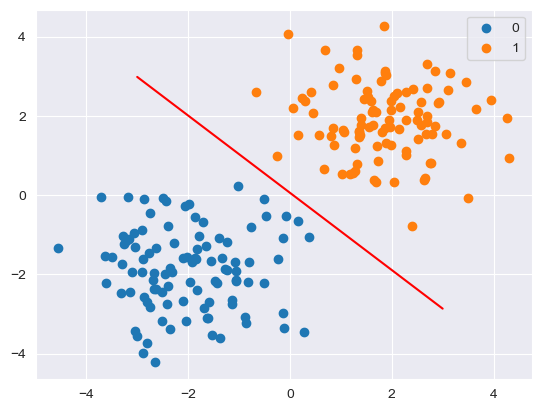

In [26]:
# 可视化
plt.scatter(X[:100, 0], X[:100, 1], label='0')
plt.scatter(X[100:, 0], X[100:, 1], label='1')
x_ = np.linspace(-3, 3, 100)
y_ = -(model.w[0] * x_ + model.b) / model.w[1]  # w0*x + w1*y + b = 0
plt.plot(x_, y_, color='r')
plt.legend()
plt.show()